In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coffee_production = pd.read_csv("../Data/coffee/total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.

In [3]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [31]:
# Set this at last

axes_settings = {
    'spines.right': False, 
    'spines.top': False
}

plt.rc("axes", **axes_settings)

### Data Prep

In [5]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production.loc[:, coffee_production.columns != 'Brazil'].sum(axis=1))
                    .loc[:, ['Brazil', 'rest_of_world']]
                    .astype({'Brazil':'float64'})
                   )

brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [6]:
countries = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']

coffee_production_top5_2018 = (coffee_production
                               .assign(rest_of_world = coffee_production.loc[:, ~(coffee_production.columns.isin(countries))].sum(axis=1))
                               .loc['2018', ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'rest_of_world']]
                              )

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
rest_of_world    45786.0003
Name: 2018, dtype: object

In [7]:
pd.DataFrame(coffee_production_top5_2018)

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
rest_of_world,45786.0003


In [8]:
top5_producers = (coffee_production
                  .assign(rest_of_world = coffee_production.loc[:, ~(coffee_production.columns.isin(countries))].sum(axis=1))
                  .loc[:, ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'rest_of_world']]
                  .sum()
                 )

top5_producers

total_production
Brazil           1190965.7353
Viet Nam          439540.9519
Colombia          345871.4464
Indonesia         245116.7707
Ethiopia          141542.8931
rest_of_world    1225391.5436
dtype: object

### Meshgrid Layout

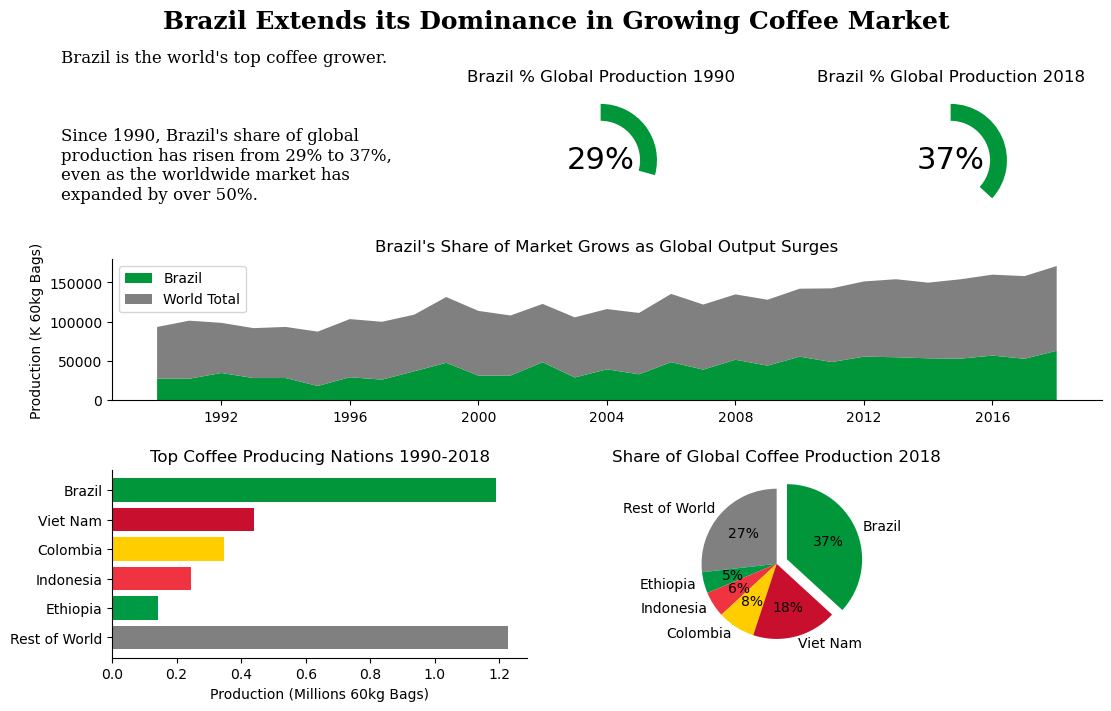

<Figure size 640x480 with 0 Axes>

In [42]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True, figsize=(11, 7))
grid = GridSpec(ncols=9, nrows=10, figure=fig)

# Figure Title
fig.suptitle('Brazil Extends its Dominance in Growing Coffee Market\n', fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(.05, .695, 
'''Brazil is the world's top coffee grower.



Since 1990, Brazil's share of global 
production has risen from 29% to 37%, 
even as the worldwide market has 
expanded by over 50%.
'''
, fontsize=12, fontweight='light', fontfamily='serif')

# Ax1 chart doesn't need
ax1 = fig.add_subplot(grid[:3, :3])
ax1.set_axis_off() # .set_axis_off() to remove chart

# For Ax2
ax2 = fig.add_subplot(grid[:3, 3:6])
ax2.pie(brazil_vs_others.loc['1990', :].sort_values(ascending=False), 
        startangle=90, 
        labels=['', ''], 
        # autopct='%.0f%%', 
#         pctdistance=.85, 
        colors=['white', '#009639']
       )

## Adding Circle in Pie chart
hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round(brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990', :].sum() * 100)}%", 
    ha='center', 
    va='center', 
    fontsize=22
)

ax2.set_title('Brazil % Global Production 1990')

# For Ax3
ax3 = fig.add_subplot(grid[:3, 6:])
ax3.pie(brazil_vs_others.loc['2018', :].sort_values(ascending=False), 
        startangle=90, 
        labels=['', ''], 
        # autopct='%.0f%%', 
        pctdistance=.85, 
        colors=['white', '#009639']
       )

## Adding Circle in Pie chart
hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round(brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018', :].sum() * 100)}%", 
    ha='center', 
    va='center', 
    fontsize=22
)

ax3.set_title('Brazil % Global Production 2018')

# For Ax4
ax4 = fig.add_subplot(grid[3:6, :])
colors = ['#009639', 'grey']
labels = ['Brazil', 'World Total']
ax4.stackplot(
    brazil_vs_others.index, 
    brazil_vs_others['Brazil'], 
    brazil_vs_others['rest_of_world'], 
    labels=labels, 
    colors=colors
)

ax4.set_title("Brazil's Share of Market Grows as Global Output Surges")
ax4.set_ylabel('Production (K 60kg Bags)')
ax4.set_xticks(brazil_vs_others.index[2::4])
ax4.legend(loc='upper left')


# Colors, Labels for Ax5, Ax6
colors = ['#009639', '#C8102E', '#FFCD00', '#EF3340', '#009A44', 'grey']
labels = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Rest of World'][::-1]

# For Ax5
ax5 = fig.add_subplot(grid[6:, :4])
positions = list(range(len(top5_producers)))
labels = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Rest of World'][::-1]
ax5.barh(
    top5_producers.index[::-1], 
    top5_producers.values[::-1] / 1000000, 
    color=colors[::-1]
)

ax5.set_yticks(positions)
ax5.set_yticklabels(labels)
ax5.set_title('\nTop Coffee Producing Nations 1990-2018')
ax5.set_xlabel('Production (Millions 60kg Bags)')

# For Ax6
ax6 = fig.add_subplot(grid[6:, 4:8])
colors = ['#009639', '#C8102E', '#FFCD00', '#EF3340', '#009A44', 'grey']
ax6.pie(
    x=coffee_production_top5_2018.values[::-1],
    startangle=90,
    labels=labels, 
    autopct="%.0f%%",
    explode = (0, 0, 0, 0, 0, .15),
    colors=colors[::-1]
)

ax6.set_title('\nShare of Global Coffee Production 2018')

# For Plotting
plt.show()

# For Saving Figure
plt.savefig("brazil_stats2", dpi=1000)

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [18]:
prices_paid_to_growers = pd.read_csv("../Data/coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [19]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


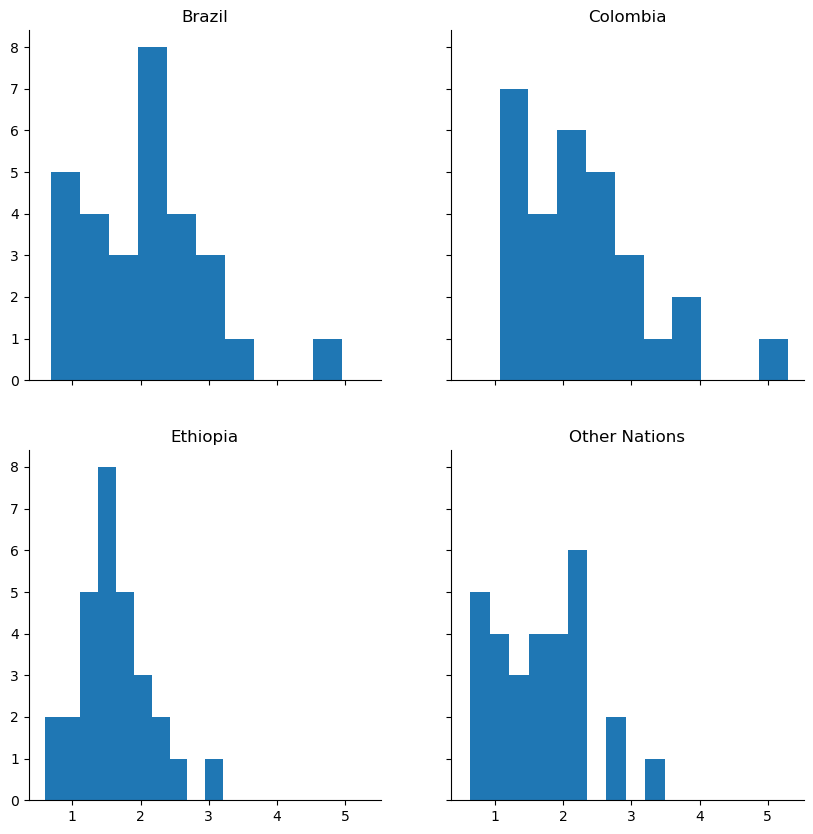

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey='all', sharex='all')

ax[0][0].hist(prices_paid_to_growers['Brazil'])
ax[0][0].set_title('Brazil')

ax[0][1].hist(prices_paid_to_growers['Colombia'])
ax[0][1].set_title('Colombia')

ax[1][0].hist(prices_paid_to_growers['Ethiopia'])
ax[1][0].set_title('Ethiopia')

ax[1][1].hist(prices_paid_to_growers['Other Nations'])
ax[1][1].set_title('Other Nations')

# For Plotting
plt.show()